**Code for reproducing the results for the paper titled "Sensitivity analysis of physical and mental health factors affecting Polycystic ovary syndrome in women"**

https://onlinelibrary.wiley.com/doi/10.1111/exsy.13413

Authors: Srirupa Guha, Ashwini Kodipalli

First published date: 26th July 2023



Execute the below cells in Google Colab or any iPython platform like Jupyter Notebook or JupyterLab for reproducing the results from the paper on the given dataset for mental health factors

In [1]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [2]:
mental_data = pd.read_csv('mentaldata.csv', index_col = 0)
physical_data = pd.read_csv('physical.csv', index_col = 0)

In [3]:
physical_data['Categ'].unique()

array(['Normal', 'Mild', 'Moderate', 'High'], dtype=object)

In [4]:
mental_data['Categ'].unique()

array(['High', 'Normal', 'Mild', 'Moderate'], dtype=object)

In [5]:
mental_data.columns

Index(['Tired for no reason', 'Nervous', 'Cant be calm', 'Hopeless',
       'Restless', 'Cant sit still', 'Depressed', 'Everything is an effort',
       'Sad and cant cheer up', 'Worthless', 'Fear evaluation',
       'Fear humiliation or embarassment', 'Extremely selfconscious',
       'Blushing and sweating', 'Avoid social situations',
       'Worry about appearance', 'Dissatisfaction with body',
       'Avoid certain clothes', 'Compare appearance and feel low',
       'Interfere with activities', 'Categ'],
      dtype='object')

In [6]:
mental_data.head()

,Tired for no reason,Nervous,Cant be calm,Hopeless,Restless,Cant sit still,Depressed,Everything is an effort,Sad and cant cheer up,Worthless,...,Fear humiliation or embarassment,Extremely selfconscious,Blushing and sweating,Avoid social situations,Worry about appearance,Dissatisfaction with body,Avoid certain clothes,Compare appearance and feel low,Interfere with activities,Categ
0,4,4,3,4,3,3,3,3,3,3,...,0,0,0,0,1,1,0,0,1,High
1,2,2,2,1,1,1,1,1,1,1,...,0,0,0,0,1,1,1,1,1,Normal
2,3,4,1,4,1,1,2,2,3,4,...,1,1,1,1,1,1,0,1,0,High
3,2,3,1,4,2,1,2,2,2,3,...,0,0,0,1,0,1,1,0,0,Mild
4,2,1,1,1,1,1,1,2,2,1,...,1,0,0,0,0,0,0,0,0,Normal


In [7]:
physical_data.head()

,Periods regularly,Cycle length,Duration,Flow,Hair growth,Weight gain,Junk food frequency,Eating pattern,Sleep pattern,Diabetes,Hypertension,Categ
0,0,0,0,0,0,0,1,0,0,0,0,Normal
1,0,0,0,0,0,1,1,0,0,1,1,Normal
2,0,0,0,2,0,0,2,0,0,0,0,Normal
3,0,0,0,0,0,1,1,0,1,0,0,Normal
4,0,0,0,0,0,1,1,0,0,1,0,Normal


#### Analysis of physical data - Physical factors affecting PCOS

#### 1. Univariate Selection

Statistical tests can be used to select those features that have the strongest relationship with the output variable.

The scikit-learn library provides the SelectKBest class that can be used with a suite of different statistical tests to select a specific number of features.

The example below uses the chi-squared (chi²) statistical test for non-negative features to select 10 of the best features from the PCOS Dataset.

In [8]:
data = physical_data
X = data.iloc[:,0:11]  #independent columns
y = data.iloc[:,-1]    #target column i.e price range

#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))  #print 10 best features

                Specs       Score
1        Cycle length  736.862881
2            Duration  457.538503
0   Periods regularly  437.020858
3                Flow  204.914553
4         Hair growth  174.123089
7      Eating pattern   91.957787
8       Sleep pattern   82.597087
5         Weight gain   32.151532
9            Diabetes   28.589060
10       Hypertension   25.093944


#### 2. Feature Importance

You can get the feature importance of each feature of your dataset by using the feature importance property of the model.

Feature importance gives you a score for each feature of your data, the higher the score more important or relevant is the feature towards your output variable.

Feature importance is an inbuilt class that comes with Tree Based Classifiers, we will be using Extra Tree Classifier for extracting the top 10 features for the dataset.

[0.25673725 0.20674814 0.05624173 0.1283735  0.06516113 0.04323248
 0.04826177 0.06346891 0.06833455 0.03078514 0.03265539]


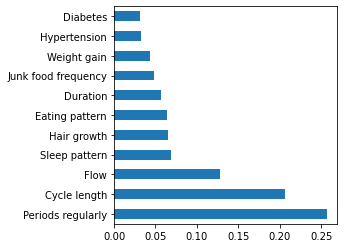

In [ ]:
data = physical_data
X = data.iloc[:,0:11]  #independent columns
y = data.iloc[:,-1]    #target column i.e price range

model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(15).plot(kind='barh')
plt.savefig('Physical_Factors_extra_tree_classifier.png')
plt.show()


#### 3. Correlation Matrix with Heatmap

Correlation states how the features are related to each other or the target variable.

Correlation can be positive (increase in one value of feature increases the value of the target variable) or negative (increase in one value of feature decreases the value of the target variable)

Heatmap makes it easy to identify which features are most related to the target variable, we will plot heatmap of correlated features using the seaborn library.

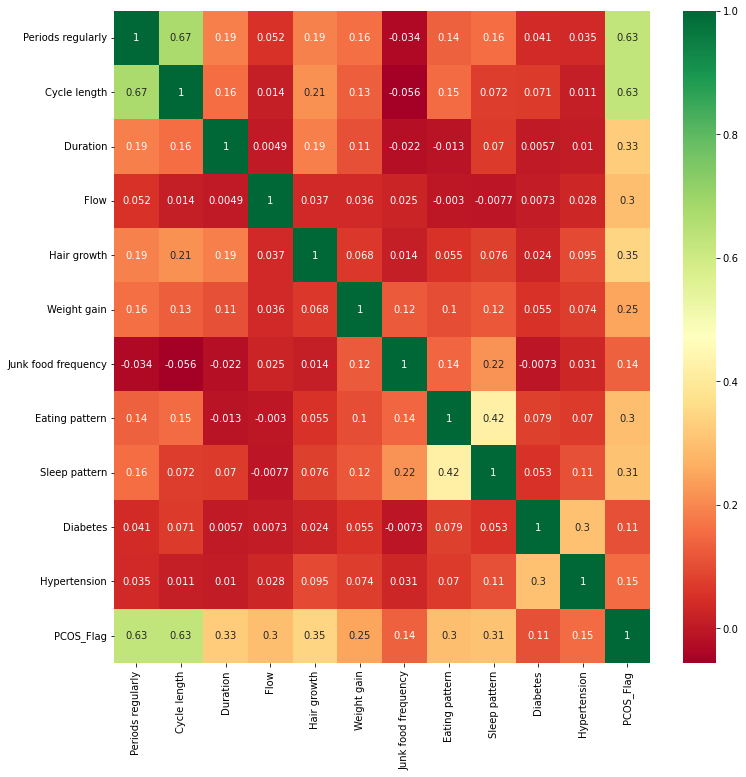

In [ ]:
data = physical_data
X = data.iloc[:,0:11]  #independent columns
y = data.iloc[:,-1]    #target column i.e price range
#get correlations of each features in dataset
corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(12,12))
#plot heat map
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")
plt.savefig('correlation matrix physical factors.png')

In [12]:
data = physical_data
data['PCOS_Flag'] = np.where(data['Categ'].isin(['High', 'Moderate']), 1, 0)

In [13]:
data

,Periods regularly,Cycle length,Duration,Flow,Hair growth,Weight gain,Junk food frequency,Eating pattern,Sleep pattern,Diabetes,Hypertension,Categ,PCOS_Flag
0,0,0,0,0,0,0,1,0,0,0,0,Normal,0
1,0,0,0,0,0,1,1,0,0,1,1,Normal,0
2,0,0,0,2,0,0,2,0,0,0,0,Normal,0
3,0,0,0,0,0,1,1,0,1,0,0,Normal,0
4,0,0,0,0,0,1,1,0,0,1,0,Normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
619,2,2,0,4,0,0,1,0,0,0,0,Moderate,1
620,2,0,0,2,0,1,0,0,0,1,0,Mild,0
621,0,0,0,2,0,0,1,0,0,0,0,Normal,0
622,0,0,0,0,0,1,1,0,0,0,1,Normal,0


In [14]:
Xtrain = data.iloc[:,0:11]  #independent columns
ytrain = data.iloc[:,-1]

# building the model and fitting the data
log_reg = sm.Logit(np.asarray(ytrain), np.asarray(Xtrain)).fit()

Optimization terminated successfully.
         Current function value: 0.365039
         Iterations 7


In [15]:
ytrain

,PCOS_Flag
0,0
1,0
2,0
3,0
4,0
...,...
619,1
620,0
621,0
622,0


In [16]:
Xtrain

,Periods regularly,Cycle length,Duration,Flow,Hair growth,Weight gain,Junk food frequency,Eating pattern,Sleep pattern,Diabetes,Hypertension
0,0,0,0,0,0,0,1,0,0,0,0
1,0,0,0,0,0,1,1,0,0,1,1
2,0,0,0,2,0,0,2,0,0,0,0
3,0,0,0,0,0,1,1,0,1,0,0
4,0,0,0,0,0,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
619,2,2,0,4,0,0,1,0,0,0,0
620,2,0,0,2,0,1,0,0,0,1,0
621,0,0,0,2,0,0,1,0,0,0,0
622,0,0,0,0,0,1,1,0,0,0,1


In [17]:
log_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                  624
Model:                          Logit   Df Residuals:                      613
Method:                           MLE   Df Model:                           10
Date:                Sat, 22 Feb 2025   Pseudo R-squ.:                  0.2744
Time:                        08:46:39   Log-Likelihood:                -227.78
converged:                       True   LL-Null:                       -313.91
Covariance Type:            nonrobust   LLR p-value:                 9.503e-32
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.6962      0.172      4.043      0.000       0.359       1.034
x2             0.6000      0.114      5.267      0.000       0.377       0.823
x3             0.6077      0.146      4.156      0.000       0.321       0.894
x4             0.1935      0.075      2.567      0.010       0.046       0.341
x5             0.6732      0.186      3.629      0.000       0.310       1.037
x6            -0.3002      0.250     -1.203      0.229      -0.789       0.189
x7            -2.3007      0.211    -10.885      0.000      -2.715      -1.886
x8             0.5579      0.201      2.782      0.005       0.165       0.951
x9             0.6356      0.211      3.019      0.003       0.223       1.048
x10           -0.8189      0.265     -3.090      0.002      -1.338      -0.299
x11            0.2255      0.284      0.795      0.427      -0.330       0.781
==============================================================================
"""